In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [19]:
class RFIM_irrational(object):
    '''A class for simulating the Random Field Ising Model '''
    
    def __init__(self, beta, J, F, N, delta, alpha):
        '''Create an instance of the RFIM with parameters J,F
        of size N, with fields h with a random normal distribution of parameter delta'''
        self.beta = beta
        self.J = J
        self.F = F
        self.N = N
        self.S = np.random.choice([-1,1], size = N)
        self.matJ = np.random.choice([-J,0,J], size = [N,N])
        self.alpha = alpha
        if delta == 0: # For the zero temperature case
            self.h = np.zeros(N)
        else:
            #self.h = np.random.laplace(scale = delta, size = N)
            #self.h = np.random.normal(loc = 0, scale = delta, size = N)
            self.h = [F]*N
        
    def m(self):
        '''Computes average opinion '''
        return np.mean(self.S)
                                   
    def p(self, i):
        '''Computes the local opinion polarization for agent i p_i
        inputs: agent label i
        returns: the field p_i'''
        local_m = (self.S.sum() - self.S[i]) / (self.N)
        return self.h[i] + self.F + self.J * local_m
    
    def g(self, i, t, h):
        return
    
    def flip(self,i0):
        '''Changes S_i -> -S_i according to the dynamic rule
        input: agent label i
        returns: 0 if the agent didn't change opinion
                 1 if the agent changed opinion
        '''
        local_sum1, local_sum2, local_sum3 = 0, 0, 0
        for i in range(N):
            for k in range(N):
                local_sum1 += self.matJ[i, k] * self.S[k] * self.S[i]
                
            local_sum2 += self.S[i]*self.h[i0]
            if self.S[i] == -1:
                local_sum3 += -1#*self.g(i, t, h)
                
        u_i0 = -local_sum1 - local_sum2 + local_sum3
        prob_flip = 1/(1 + np.exp(beta*u_i0))
        
        if np.random.random() < prob_flip:
            self.S[i0] *= -1
            return 1
        else:
            return 0
    
    def sweep(self):
        '''Goes through all N agents and tries to flip them
        input: none
        returns: number of agents that changed their mind
        '''
        s = 0
        elements = list(range(N))
        np.random.shuffle(elements)
        for i in elements:
            s += self.flip(i)
        return s
    
    def equilibrate(self): # Needs modification for finite temperature case
        '''Find the equilibrium of the system'''
        flips = self.sweep()
        count = 0
        while count < 100:
            flips = self.sweep()
            count += 1

In [56]:
J = 1
delta = 1
N = 100
F = 0
M = 1 # number of repetitions
beta = 1/(10**(-23))
sim2 = RFIM_irrational(beta,J,F,N,delta,0.1)
sim2.S
#m = np.empty((len(betas),M))


array([-1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1])

In [30]:
def fev(l):
    acc = 0
    for i in l:
        if i <0:
           acc+=1
    return(acc/len(l))

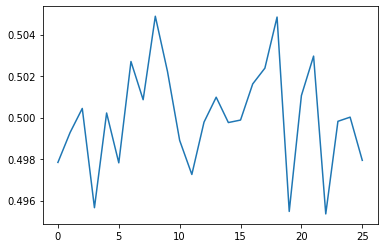

In [58]:
x = list(range(26))
y = []
for x0 in x:
    acc = []
    for i in range(500):
        acc.append(fev(RFIM_irrational(beta,J,x0,N,delta,0.1).S))
    y.append(np.mean(acc))
plt.plot(x,y)

In [59]:
RFIM_irrational(beta,J,10000000000000000000000000000000000000000000000000000000000000000000000,N,delta,0.1).S

array([-1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1])

In [52]:
for j in range(M):
    beta = 0
    sim2.equilibrate()
    for i in range(len(betas)):
        beta = betas[i]
        sim2.beta = beta
        sim2.equilibrate()
        m[i,j] = sim2.m()
    print(j)
m2 = np.average(m**2,axis=1)

KeyboardInterrupt: 

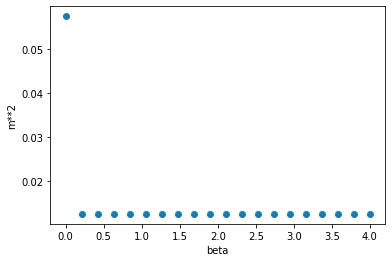

In [8]:
plt.scatter(betas,m2)
plt.xlabel('beta')
plt.ylabel("m**2")
plt.show()